Author: Emilio Codecido

This notebook clusters Indian districts by their geographical proximity to each other. This serves as a comparison to clusters identified based on environmental parameters.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import sys, os
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

In [2]:
#Loading shape file for districts
path_to_data = '../Raw_data/India_districts2020.shp'
gdf = gpd.read_file(path_to_data)

distname = gdf.distname[0]
gdf2 = gdf.geometry.to_crs('epsg:4326')

#lat = gdf2.geometry[i].centroid.y
#lon = gdf2.geometry[i].centroid.x

In [3]:
#Creating an array with latitudes and longitudes for the centroid of each district
lat = gdf2.geometry[0].centroid.y
lon = gdf2.geometry[0].centroid.x

X = np.array([[lat,lon]])

for i in range(1,len(gdf2)):
     
    lat = gdf2.geometry[i].centroid.y
    lon = gdf2.geometry[i].centroid.x
    
    X = np.append(X,[[lat, lon]],axis=0)


In [4]:
#Clustering using KMeans
kmeans = KMeans(10)

kmeans.fit(X)

clusters = kmeans.predict(X)

df = pd.DataFrame({'cluster': clusters})

In [5]:
df

,cluster
0,2
1,5
2,5
3,2
4,5
...,...
688,7
689,4
690,7
691,5


In [6]:
#Adding cluster results to original shape file
gdf["cluster"]= df.cluster + 1
gdf

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,cluster
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,5.061827e+05,"POLYGON ((79.52659 29.05543, 79.52550 29.05545...",3
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,5.781887e+05,"POLYGON ((77.87557 30.26052, 77.87467 30.26087...",6
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,4.634542e+05,"POLYGON ((79.28494 29.92735, 79.28495 29.92723...",6
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,3.145080e+05,"POLYGON ((80.12479 29.01308, 80.12481 29.01306...",3
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,7.864256e+05,"POLYGON ((78.92267 31.25333, 78.93106 31.26840...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,691,36,Telangana,STATE,T28,Wanaparthy,NaN,577758.0,123544.0,294833.0,282925.0,2.471575e+09,2.894403e+05,"POLYGON ((78.23115 16.43789, 78.23471 16.38793...",8
689,692,36,Telangana,STATE,T27,Vikarabad,NaN,927140.0,194956.0,463350.0,463790.0,3.978808e+09,3.723430e+05,"POLYGON ((77.41953 17.12279, 77.41852 17.12334...",5
690,693,36,Telangana,STATE,T13,Mahabubnagar,NaN,1486777.0,300508.0,745101.0,741676.0,5.627610e+09,4.420680e+05,"POLYGON ((77.49606 16.38155, 77.49382 16.38188...",8
691,41,01,Ladakh,STATE,004,Kargil,14036.0,140802.0,18338.0,77785.0,63017.0,2.152617e+10,1.151337e+06,"POLYGON ((76.13869 34.63398, 76.13957 34.63408...",6


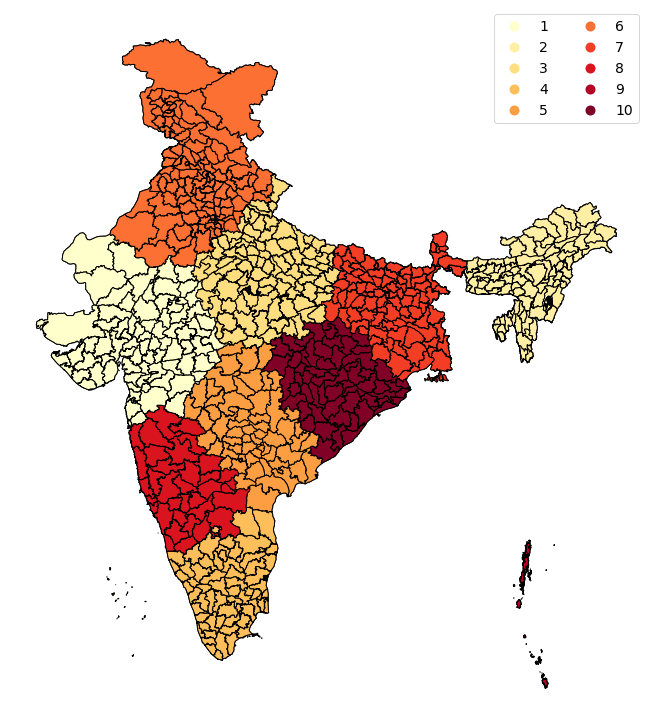

In [7]:
#Plotting

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
gdf.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=False, categorical=True, 
        missing_kwds={'color': 'lightgrey'})

# Show map without NaNs.
#noNaNs = gdf.dropna().copy()
#noNaNs.cluster = noNaNs.cluster.astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14, ncol=2) 
gdf.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=True, categorical=True,
                  legend_kwds=legend_kwds)

# Hide axes.
ax.set_axis_off()
plt.show()

Checking inertia vs number of clusters. Plotting interia and log(intertia) vs # of clusters k.

In [8]:
inertias = []
max_k = 30
for k in range(1,max_k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    
   
    inertias.append(kmeans.inertia_)
    

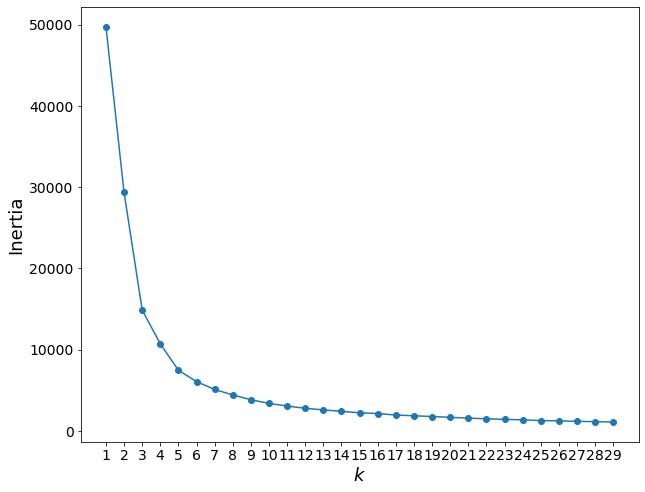

In [9]:
plt.figure(figsize=(10,8))

plt.plot(range(1,max_k), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,max_k),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

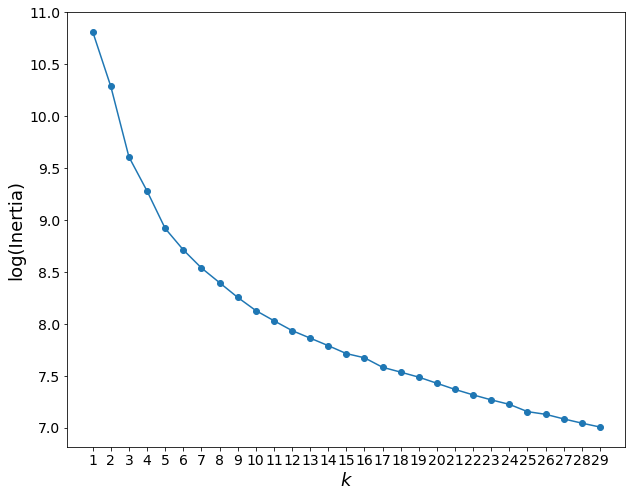

In [10]:
plt.figure(figsize=(10,8))

plt.plot(range(1,max_k), np.log(inertias), '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("log(Inertia)", fontsize=18)

plt.xticks(range(1,max_k),fontsize=14)
plt.yticks(fontsize=14)

plt.show()